In [86]:
%load_ext autoreload
%autoreload 2
from time import time
from skipGram import SkipGram, text2sentences, loadPairs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
sentences = text2sentences('train.txt')
true_results = loadPairs('simlex.csv')
prediction_results =pd.read_csv('results.txt', names =['similarity'])

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
20000


# Additional experiments :  
In this notebook we will try to tune different hyperparameters of our model :  
- try to run the model on different texts sizes  
- try to run the model with different embedding sizes, window sizes ...   

## Data_set_size impact 

The first figure below shows the number of words in the dictionary as a function of the number of sentences.

In [9]:
def count_number(max_):
    l=[]
    for i in np.arange(20,max_,3000):
        sg =SkipGram(sentences[0:i])
        l.append(len(sg.w2id))
    return l

In [10]:
nbr_of_word_in_dict = count_number(20000)

Text(0, 0.5, 'nbr of distinct word')

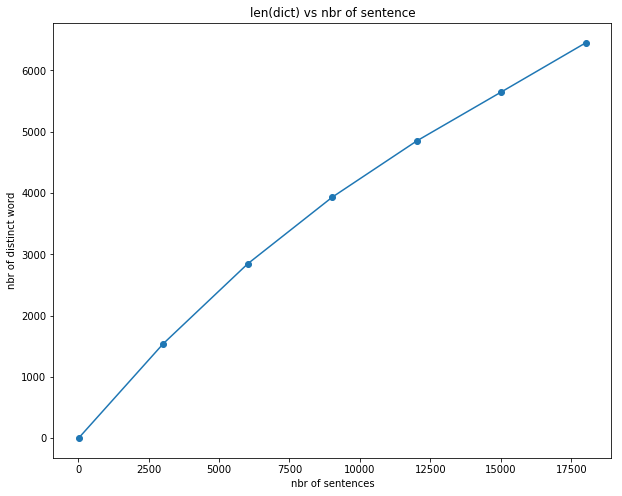

In [11]:
plt.figure(figsize=(10,8))
plt.title('len(dict) vs nbr of sentence')
plt.plot(np.arange(20,20000,3000), nbr_of_word_in_dict, marker='o')
plt.xlabel('nbr of sentences')
plt.ylabel('nbr of distinct word')

As we can see above: if we want to have a good representation of the dictionary, we need to take a huge quantity of sentences.  
But if we train our model on more than 10000 sentences, the training time becomes too long (see the next figure).

### Time for training   
We will train our model on different training_set size and see the impact on the training time:



In [88]:
def time_to_train(max_):
    l=[]
    for i in np.arange(300,max_,300):
        t1 = time()
        sg =SkipGram(sentences[0:i])
        sg.train(1)
        t2 = time()
        l.append(t2-t1)
    return l
time_to_train = time_to_train(5000)

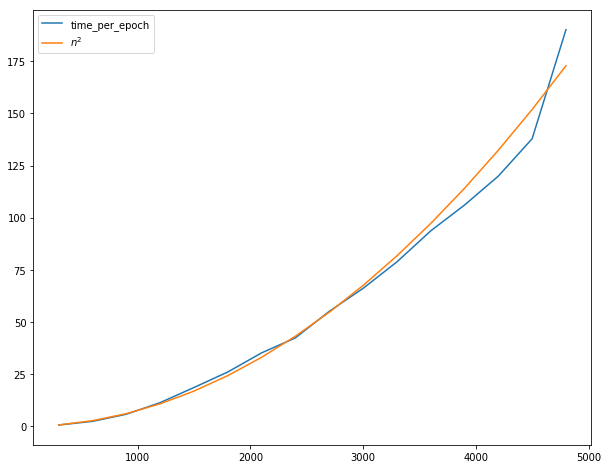

In [102]:
plt.figure(figsize=(10,8))
x= np.arange(300,5000,300)
plt.plot(x,time_to_train,label= 'time_per_epoch')
plt.plot(x,7.5e-6*x**2, label= '$n^2$')
plt.legend()

As we can see the training time per epoch is not linear but might have a complexity $n^2$.

# Loss  
The loss is computed at each 100 words.  
ex: for word_i and context word_j  
$ loss(i,j) = \frac{1}{1 + e^{-U_i V_j}} $  
With $V_j$ the context vector for the word j, and $ U_i $  the target vector for the word i  
During the training the loss should decrease:  
the next plot show us the loss function deacresing during the training for a model trained on 1000, 2000 and 3000 sentences: 

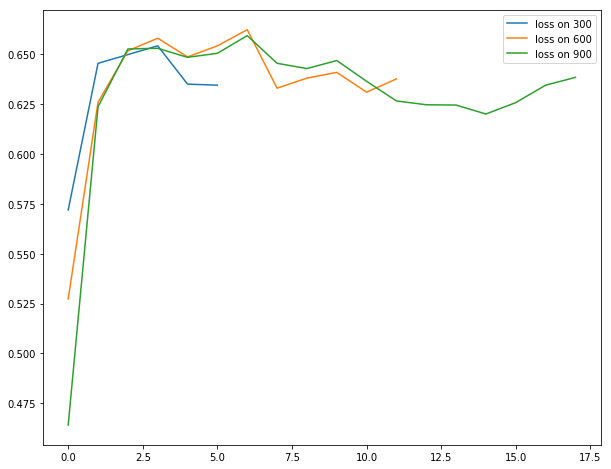

In [107]:
plt.figure(figsize=(10,8))
for i in range(3):
    nbr_sentence = (i+1)*1000
    sg =SkipGram(sentences[0:nbr_sentence])
    sg.train(4)
    plt.plot(sg.loss,label= f'loss on {nbr_sentence} sentences')
    plt.legend()

## Hyperparameter influence  
Our model contains some hyperparameters: winSize, negativerate, nEmbed  
Here we will test the influence of the winSize and negative rate on the loss function. 

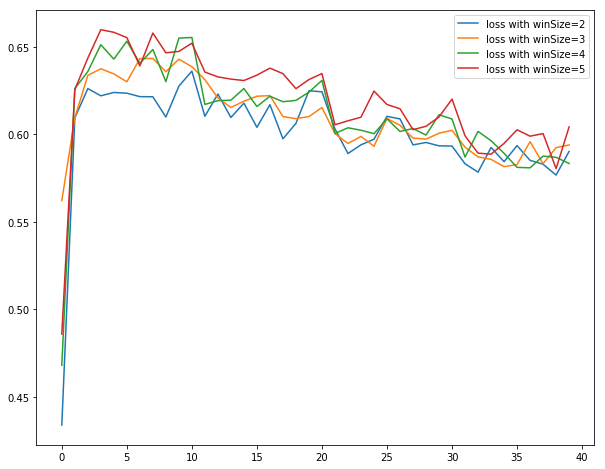

In [114]:
plt.figure(figsize=(10,8))
for i in range(2,6):
    nbr_sentence = 1000 
    sg =SkipGram(sentences[0:nbr_sentence], winSize=i)
    sg.train(4)
    plt.plot(sg.loss,label= f'loss with winSize={i}')
    plt.legend()
    plt.title('influance of the winSize')

The winSize might have a little influence on the loss function.  
Indeed the model seems to be better if the winSize is set as 2. 

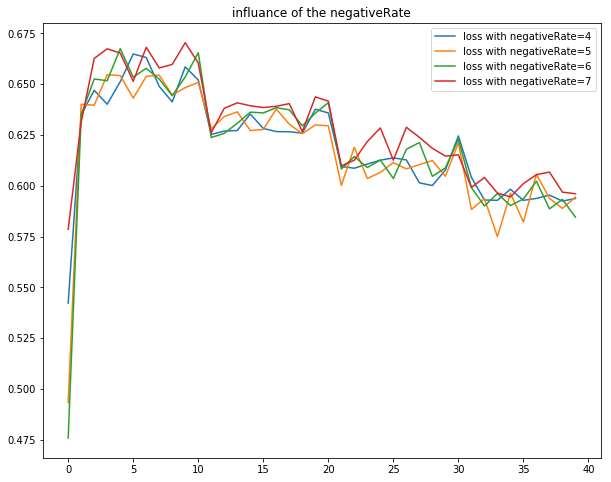

In [116]:
plt.figure(figsize=(10,8))
for i in range(4,8):
    nbr_sentence = 1000 
    sg =SkipGram(sentences[0:nbr_sentence], negativeRate=i)
    sg.train(4)
    plt.plot(sg.loss,label= f'loss with negativeRate={i}')
    plt.legend()
    plt.title('influance of the negativeRate')

The negativeRate doesn't appear to have a big influence on the loss function.

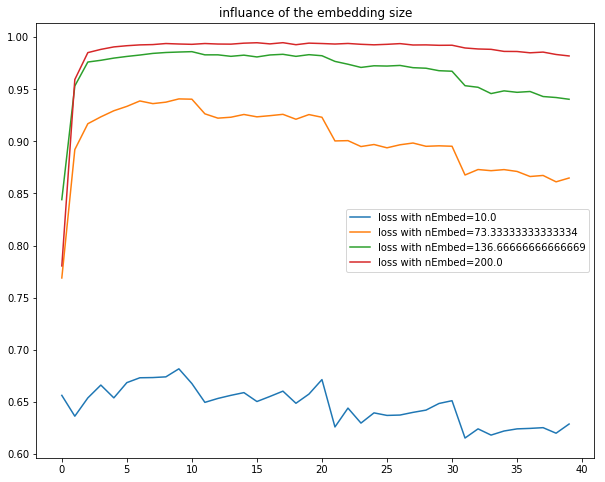

In [142]:
plt.figure(figsize=(10,8))
for i in np.linspace(10, 200,4):
    nbr_sentence = 1000 
    sg =SkipGram(sentences[0:nbr_sentence], negativeRate=2, nEmbed=int(i))
    sg.train(4)
    plt.plot(sg.loss,label= f'loss with nEmbed={i}')
    plt.legend()
    plt.title('influance of the embedding size')

On our example: the loss function seems to be better with a small embedding size (10).  
But here we trained our model on a very small data set containing 1000 sentences. In a real case, we would have a data set with more than 100 000 sentences and we would be able to train our model on many epochs. 

# Score   
### similarity : 
The similarity between two words is computed with the following equation:  
  
$s(word_i, word_j) = \frac{U_iU_j}{|U_i| |U_j|} $  
  
  
 

At first, we will train a model on a 5000 sentences data set and then we will compute the similarity of two obviously similar words.  For our example, we will compare the word "obama" and the word "president".

In [175]:
sg= SkipGram(sentences[0:5000])
sg.train(5)

In [176]:
sg.similarity('obama','president')

0.16917067050896503

This similarity should be close to 1 because these two words are often found together in a text.  
But here we train our model on 5000 sentences which is not enough to have a representative similarity. 

# Conclusion  
In this notebook, we tried to tune some hyperparameters to improve the precision of our model (having the lowest loss function as possible). But because of the very long training time, we can not train our model on a big data set and on many epochs. So as a conclusion, it is difficult to know if our deductions on hyperparameters are really representative. 